# 15 머신러닝을 이용한 예측 분석
머신러닝 모델을 이용해 예측 분석을 하는 방법 알아보기

## 15-1 머신러닝 모델 알아보기
(1) 머신러닝 모델이란?  
(2) 머신러닝 모델을 이용해 어떻게 예측을 하는가?

**`머신러닝 모델`**
- 함수처럼 입력값과 출력값이 있음
- 함수는 사람이 계산 규칙을 정해주지만, 머신러닝 모델은 컴퓨터 알고리즘이 데이터에서 스스로 찾은 패턴에 의해 규칙이 정해짐


- **예측 변수**(성별, 나이, 흡연, 음주 등, predictor variable) => 머신러닝 모델 => **타겟 변수**(당뇨병 yes/no, target variable)
    - 사람은 환자의 정보와 당뇨병 발병 여부 데이터를 수집해 머신러닝 알고리즘에 입력
    - 컴퓨터는 입력된 환자 정보와 당뇨병 발병 간 패턴을 찾아 새로운 환자 정보를 입력하면 당뇨병 발병 여부를 예측하는 머신러닝 모델을 도출
    - 사람은 만들어진 머신러닝 모델을 이용하여 새로운 환자의 당뇨병 발병 여부 예측
    
    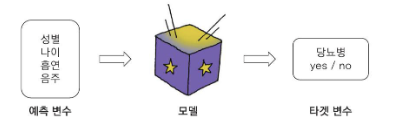
    
    
- 과거 및 현재의 예측 변수 값에 기반하여 미래의 타겟 변수 값을 예측함으로써 부가 수익을 창출하고 비용을 줄이는 용도로 자주 사용됨
    - ex) 의료: 현재 환자의 신체 정보 => 3년 뒤 당뇨병 발병 여부 예측
    - ex) 온라인 커머스: 구매 가능성 높은 상품 예측하여 추천
    - ex) 마케팅: 가입 가능성 높은 고객 예측하여 홍보 전화
    - ex) 금융사: 상환 가능성 예측하여 대출 승인
    - ex) 반도체 공장: 설비 고장 가능성 예측하여 미리 정비
 

**`의사결정나무 모델`**
- 다양한 머신러닝 모델 중 구조가 단순하고 작동 원리를 이해하기 쉬워 여러 분야에서 적용
- 마치 스무고개 놀이처럼 순서대로 주어진 질문에 yes/no로 답하면 결론을 얻는 구조
- 질문이 나열된 모양이 가지를 뻗은 **나무**와 비슷하고 예측값을 무엇으로 할지 **의사결정**해 주기 때문에 의사결정나무라고 부름
    - ex) 새로운 환자: 나이 45세, 음주 no
        - (질문1) 나이 40세 이하입니까? no(오른쪽 가지) => (질문2) 음주합니까? no(오른쪽 가지) => 예측 결과 정상

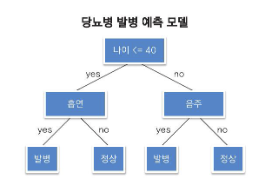

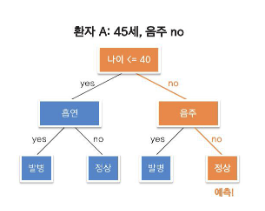

- 의사결정나무 모델이 만들어지는 기본 원리: 어떤 순서로 어떤 질문을 할지 정하는 과정을 통해 만들어짐
    - 1단계: 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기  
    
    예측 변수: 흡연 여부, 음주 여부, 성별, 나이  
    타겟 변수: 당뇨병 발병 여부  
    
        (1) 모든 예측 변수를 yes/no로 답할 수 있는 질문으로 변환.  
            ex) 범주 변수 - 흡연 여부 => 흡연을 하십니까?   
                연속 변수 - 나이가 x세 이하입니까?    
        (2) 데이터를 예측 변수 각각의 질문에 대입하여 yes로 답한 데이터만 추출  
        (3) 발병인과 정상인의 비율 차이를 가장 크게 분할하는 예측 변수 선택  
            (실제 계산에서는 노드 분리 전후를 비교하여 지니 계수(gini index),   
            엔트로피(entropy)와 같은 불순도(impurity)를 가장 줄여주는 예측 변수   
            선택)

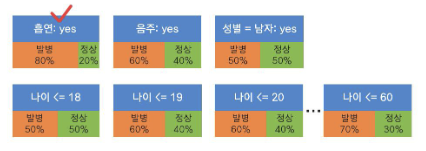

- 의사결정나무 모델이 만들어지는 기본 원리: 어떤 순서로 어떤 질문을 할지 정하는 과정을 통해 만들어짐   
    - 2단계: 첫 번째 질문의 답변에 따라 데이터를 두 노드로 분할하기  
        - 전체 데이터를 답변이 yes이면 왼쪽 노드, no이면 오른쪽 노드로 분류  
        - 노드 - 질문에 대한 답변이 같아서 함께 분류된 집단  
        
    - 3단계: 각 노드에서 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기  
        - 각 노드에서 타겟 변수를 가장 잘 분리해주는 예측 변수 선택  
        - 1~2단계 작업을 노드별로 반복
        
    - 4단계: 각 노드가 완벽하게 분리되면 종료
        - 노드에 발병과 정상 중 한 쪽 범주만 남으면 분할 종료

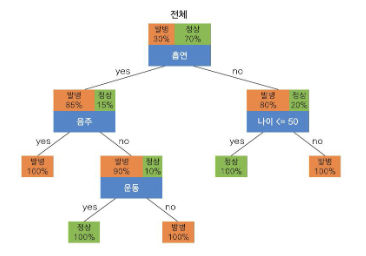

## 15-2 소득 예측 모델 만들기
- adult 데이터: 미국인의 성별, 인종, 직업, 학력 등 다양한 인적 정보를 담고 있는 인구 조사 데이터  
- adult 데이터를 이용해 인적 정보로 소득을 예측하는 의사결정나무 모델 만들기
- 모델 만드는 절차: **`데이터 전처리 => 모델 만들기 => 예측 및 성능 평가`**

In [1]:
import pandas as pd
# df = pd.read_csv('./Data/adult.csv')
df = pd.read_csv('Data/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**`adult 데이터`**
- 48,842명의 정보
- 변수 15개: 순서대로 나이, 근로 형태, 인구통계 가중치, 최종 학력, 교육 기간, 결혼 상태, 직종, 가구주와의 관계, 인종, 성별, 자본 소득(USD), 자본 손실(USD), 주당 근무 시간, 출신 국가, 연소득
- 연소득(income)을 타겟 변수, 나머지 14개 변수를 예측 변수로 사용

### 데이터 전처리하기
데이터 전처리(data preprocessing): 모델을 만드는데 적합하도록 데이터를 가공하기

#### 1. 타겟 변수 전처리

In [2]:
df[['income']].head()

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K


In [3]:
df['income'].value_counts(normalize = True)  # normalize = True: 범주 비율

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [4]:
# 변수 값에 특수문자나 대소문자가 섞여 있으면 다루기 불편하므로 변환
import numpy as np
df['income'] = np.where(df['income'] == '>50K', '1', '0')
df['income'].value_counts(normalize = True)

0    0.760718
1    0.239282
Name: income, dtype: float64

#### 2. 불필요한 변수 제거하기
- 일반적으로 타겟 변수와 관련성이 없는 이름, 아이디 등의 변수는 제거
- fnlwgt: adult 데이터를 이용하여 미국의 실제 인구를 추정할 때 사용하는 가중치이고, 인종, 성별, 나이 등 인구 통계 속성이 같으면 같은 값을 가짐. 타겟 변수를 예측하는 데 도움이 되지 않으므로 제거

In [6]:
df = df.drop(columns = 'fnlwgt')

KeyError: "['fnlwgt'] not found in axis"

#### 3. 문자 타입 변수를 숫자 타입으로 바꾸기
- 모델에 사용되는 모든 변수는 숫자 타입이어야 함
- 판다스의 object 타입인 문자 타입 변수들을 숫자 타입으로 변환
    - 원핫 인코딩(one-hot encoding): 특정 범주에 속하면 1, 아니면 0으로 인코딩하는 방법
        - 참고: 원핫 인코딩으로 만들어진 변수들은 unit8 타입(0~255 양수를 담을 수 있는 데이터 타입)

**원핫 인코딩하기**

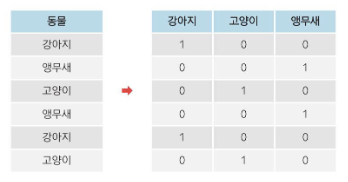

In [7]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [8]:
df[['sex']].head()

,sex
0,Male
1,Male
2,Male
3,Male
4,Female


In [9]:
df_tmp['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [10]:
# df_tmp의 문자 타입 변수에 원핫 인코딩 적용
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  uint8
 1   sex_Male    48842 non-null  uint8
dtypes: uint8(2)
memory usage: 95.5 KB


In [11]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [12]:
target = df['income']             # income 추출

df = df.drop(columns = 'income')  # income 제거 income 도 문자 타입 변수이므로 제거
df = pd.get_dummies(df)           # 문자 타입 변수 원핫 인코딩, 숫자 타입은 그대로

df['income'] = target             # df에 income 다시 삽입
df.info()

# 변수의 수가 108개로 늘어남, 변수의 수가 100개를 넘으면 info()에서 개별 변수의 정보가 출력되지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: int64(5), object(1), uint8(102)
memory usage: 7.0+ MB


In [13]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: object

In [14]:
# 변수의 수가 100개를 넘으면 개별 변수의 정보가 출력되지 않음 => max_cols = np.inf 추가
import numpy as np
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        48842 non-null  int64 
 1   education_num                              48842 non-null  int64 
 2   capital_gain                               48842 non-null  int64 
 3   capital_loss                               48842 non-null  int64 
 4   hours_per_week                             48842 non-null  int64 
 5   workclass_?                                48842 non-null  uint8 
 6   workclass_Federal-gov                      48842 non-null  uint8 
 7   workclass_Local-gov                        48842 non-null  uint8 
 8   workclass_Never-worked                     48842 non-null  uint8 
 9   workclass_Private                          48842 non-null  uint8 
 10  workclass_Self-emp-inc           

#### 4. 데이터 분할하기
- 모든 데이터를 사용해 모델을 만들면 성능 평가 점수를 신뢰할 수 없음
    - 모델을 만들 때 사용한 데이터로 성능 평가를 하면? 학생이 연습 문제로 공부한 다음 똑같은 문제로 시험을 치르는 상황과 비슷
- 신뢰할 수 있는 성능 평가 점수를 얻는 방법
    - 전체 데이터를 트레이닝/테스트 세트로 분할
        - 트레이닝 세트(training set, 훈련 세트): 모델을 만들 때 사용하는 데이터
        - 테스트 세트(test set, 평가 세트): 모델의 성능을 평가할 때 사용하는 데이터
    - K-fold 크로스 밸리데이션(cross validation)
        - 전체 데이터를 K개로 등분할하고 K-1개는 훈련에 사용, 1개는 테스트에 사용하는 작업을 K번 반복하고 평균을 사용하여 성능을 평가하는 방법

#### `adult` 데이터 분할하기
- sklearn(scikit-learn) 패키지: 머신러닝 모델을 만들 때 가장 많이 사용하는 패키지

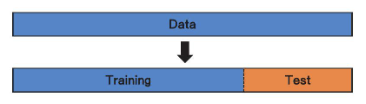

In [15]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트의 분할 비율
                                     stratify = df['income'],  
# 트레이닝과 테스트 세트의 타겟 변수(stratify= income) 범주별 비율을 비슷하게 맞춰서 분할
                                     random_state = 1234)      
# 데이터 분할 시 난수를 사용하므로 코드를 반복 실행해도 같은 데이터 세트를 얻을 수 있도록 난수를 고정,재현가능성 확보
# 난수 사용시 OS나 패키지 버전에 따라 결과가 조금씩 다를 수 있음

In [16]:
# train
df_train.shape

(34189, 108)

In [17]:
# test
df_test.shape

(14653, 108)

In [18]:
# train
df_train['income'].value_counts(normalize = True)

0    0.760713
1    0.239287
Name: income, dtype: float64

In [19]:
# test
df_test['income'].value_counts(normalize = True)

# 두 데이터 세트의 타겟 변수 범주 비율이 비슷하게 분할됨

0    0.760732
1    0.239268
Name: income, dtype: float64

### 의사결정나무 모델 만들기
-sklearn 패키지의 tree.DecisionTreeClassifier() 클래스 사용

#### 모델 설정하기

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  
# 변수 선택 과정에서 여러 예측 변수가 타겟 변수를 똑같이 잘 분리할 때 난수를 사용하므로 재현성을 위해 고정
                                  max_depth = 3)        
# 나무 깊이: 노드를 최대 몇 번까지 분할할지 설정, 설정하지 않으면 노드에 타겟 변수 한 범주만 남을 때까지 분할

#### 모델 만들기
- X에는 예측 변수, y에는 타겟 변수 저장
- tree.DecisionTreeClassifier() 클래스의 인스턴스에게 X와 y 입력하여 메소드 fit() 실행시키기 

In [21]:
train_x = df_train.drop(columns = 'income')  # 예측 변수 추출
train_y = df_train['income']                 # 타겟 변수 추출

model = clf.fit(X = train_x, y = train_y)    # 모델 만들기

## 파라미터 최적화 -그리드 서치 (의사결정나무)

In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Start with an initial guess for parameters
param_grid = {
    'max_depth': [5, 10, 20, 30], 
    'min_samples_split': [5, 10, 20, 30], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)  #  n_jobs=-1 all CPUsgridSearch.fit(train_x, train_y)
gridSearch.fit(train_x, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_
#plotDecisionTree(bestClassTree, feature_names=train_x.columns)

Initial score:  0.8571177987673781
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved score:  0.8524964660955865
Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}


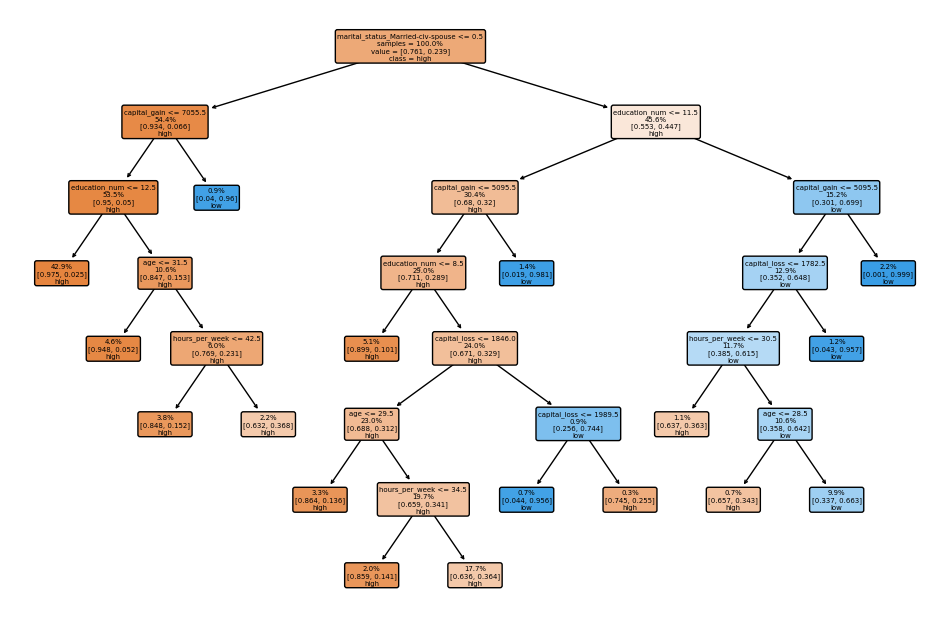

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize' : [12, 8],  # 그래프 크기 설정
                     'figure.dpi'     : '100'})   # 해상도 설정

tree.plot_tree(bestClassTree,
               feature_names = df_train.columns,  # 예측 변수명
               class_names = ["high", "low"],    # 타겟 변수 클래스, 알파벳순, 타겟의 범주를 클래스라 함
               proportion = True,                # 비율 표기
               filled = True,                    # 노드 색칠
               rounded = True,                   # 둥근 테두리
               impurity = False,                 # 불순도 표시
               label = 'root',                   # impurity label root 노드만, 'all', 'none'
               fontsize = 5);     

In [60]:
y_pred_prob_tree

array([0.3637263 , 0.05176768, 0.15170279, ..., 0.66271839, 0.15170279,
       0.3637263 ])

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
y_pred_tree =bestClassTree.predict(test_x)
y_pred_prob_tree= bestClassTree.predict_proba(test_x)[:,1]

# 최적의 의사결정나무 모델의 성능을 계산하여 출력
print("accuracy: %.2f" % accuracy_score(test_y, y_pred_prob_tree))
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = test_y,  # 실제값
                            y_pred = y_pred_prob_tree)  # 예측값
                        
conf_mat

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### 모델 구조 살펴보기
- 완성된 모델을 그래프로 시각화하여 구조 살펴보기

In [26]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'figure.figsize' : [12, 8],  # 그래프 크기 설정
                     'figure.dpi'     : '100'})   # 해상도 설정
                     
#tree.plot_tree(bestClassTree);                            # # tree.plot_tree() 파라미터 기본값으로 시각화

IndentationError: unexpected indent (<ipython-input-26-7aa60d35fc26>, line 3)

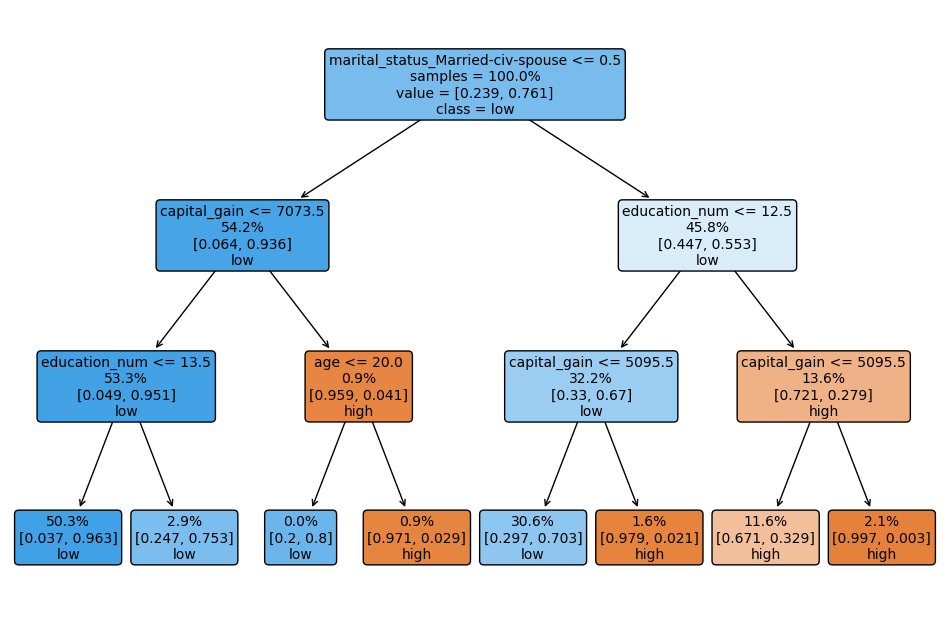

In [52]:
# 파라미터 추가하여 그래프 수정하기
#tree.plot_tree(model,
 #              feature_names = train_x.columns,  # 예측 변수명
  #             class_names = ["high", "low"],    # 타겟 변수 클래스, 알파벳순, 타겟의 범주를 클래스라 함
   #            proportion = True,                # 비율 표기
    #           filled = True,                    # 노드 색칠
     #          rounded = True,                   # 둥근 테두리
      #         impurity = False,                 # 불순도 표시
       #        label = 'root',                   # impurity label root 노드만, 'all', 'none'
        #       fontsize = 10);                   # 글자 크기

# marital_status_Married-civ-spouse: 원핫 인코딩으로 만들어진 변수로 기혼이면 1, 
# 비혼이면 0으로, 비혼이면 yes

# 노드의 색깔은 우세한 타겟 변수의 클래스에 따라 달라짐(ex) 'high' 클래스의 비율이 더 높은 노드는 주황색)
# 노드 색깔의 농도는 한 클래스의 비율이 다른 클래스보다 높을수록, 즉, 불순도(impurity)는 낮고 순도(purity)는 높을수록 진함 

In [139]:
# class_names = ["high", "low"] 입력하는 것보다 아래 변수 값 사용하기를 권장  
model.classes_

array(['0', '1'], dtype=object)

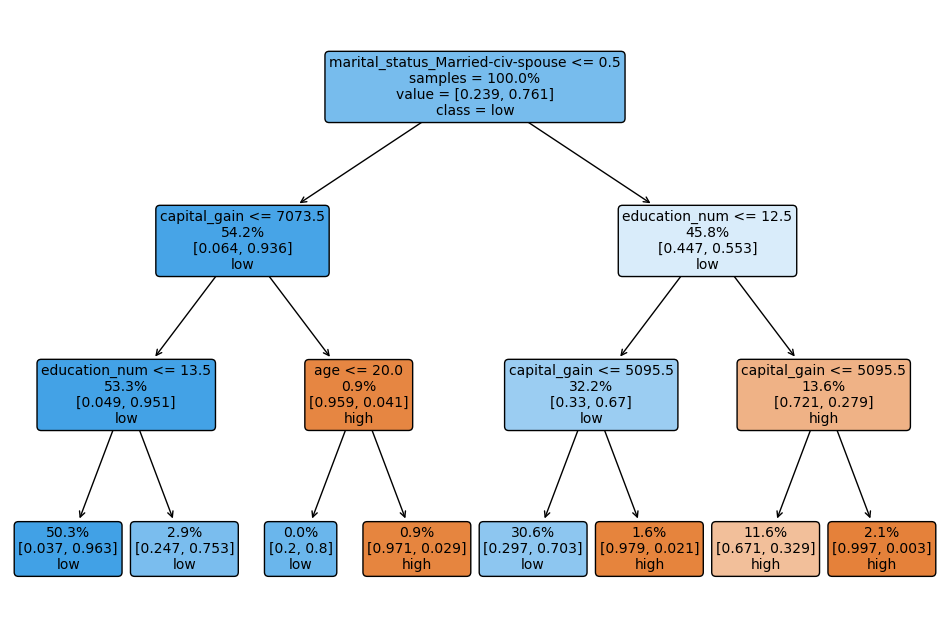

In [166]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = model.classes_,    # ["high", "low"] 수동으로 입력하는 대신 model.classes_ 사용
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = False,                 # 불순도 표시
               label = 'root',                   # impurity label 
               fontsize = 10);                   # 글자 크기

### 모델을 이용해 예측하기
- 앞에서 만든 모델을 사용하여 새로운 데이터의 타겟 변수 예측하기
- 모델을 만들 때 사용하지 않은 테스트 데이터 사용
- model의 predict() 사용

In [27]:
test_x = df_test.drop(columns = 'income')  # 예측 변수 추출
test_y = df_test['income']                 # 타겟 변수 추출

In [28]:
# 예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
36098,52,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
33971,31,14,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
22312,61,13,0,0,30,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17556,51,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
11030,22,10,0,0,32,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26542,50,14,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7800,23,3,0,0,35,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46859,29,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
41402,37,14,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [29]:
test_x.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
36098,52,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33971,31,14,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22312,61,13,0,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17556,51,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11030,22,10,0,0,32,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀 모델을 학습
lr = LogisticRegression()
lr.fit(train_x, train_y)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환
y_pred_l1 = lr.predict(test_x)
y_pred_probability = lr.predict_proba(test_x)[:,1]
y_pred_l1
print("accuracy: %.2f" % accuracy_score(test_y, y_pred_l1))
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = test_y,  # 실제값
                            y_pred = y_pred_l1)  # 예측값
                        
conf_mat


accuracy: 0.84


array([[10467,   680],
       [ 1603,  1903]], dtype=int64)

In [58]:
# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력
#print("accuracy: %.2f" % accuracy_score(test_y, y_pred))
#print("Precision : %.3f" % precision_score(test_y, y_pred))
#print("Recall : %.3f" % recall_score(test_y, y_pred))
#print("F1 : %.3f" % f1_score(test_y, y_pred))

## 파라미터 최적화- 그리드 서치(로지스틱회귀)

In [52]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#로지스틱 회귀 그리드 서치
# Start with an initial guess for parameters
params1={'penalty': ['l1', 'l2'],  'C': [0.01, 0.1]}
gridSearch = GridSearchCV(LogisticRegression(), params1, cv=5, n_jobs=-1)  #  n_jobs=-1 all CPUsgridSearch.fit(train_x, train_y)
gridSearch.fit(train_x, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
params2={'penalty': ['l2'],  'C': [0.05,0.06,0.07,0.08,0.09, 0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6]}
gridSearch = GridSearchCV(LogisticRegression(), params1, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestLogistic = gridSearch.best_estimator_
#plotDecisionTree(bestClassTree, feature_names=train_x.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Initial score:  0.835561317663901
Initial parameters:  {'C': 0.01, 'penalty': 'l2'}
Improved score:  0.835561317663901
Improved parameters:  {'C': 0.01, 'penalty': 'l2'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀 모델을 학습
lr2 = LogisticRegression(penalty='l2',C=0.1,random_state=0)
lr2.fit(train_x, train_y)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환
y_pred_l2 = lr2.predict(test_x)
y_pred_probability = lr2.predict_proba(test_x)[:,1]
y_pred_l2
print("accuracy: %.2f" % accuracy_score(test_y, y_pred_l2))
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = test_y,  # 실제값
                            y_pred = y_pred_l2)  # 예측값
                        
conf_mat

accuracy: 0.83


array([[10275,   872],
       [ 1685,  1821]], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = test_y,  # 실제값
                            y_pred = y_pred_l2)  # 예측값
                        
conf_mat

array([[10275,   872],
       [ 1685,  1821]], dtype=int64)

In [42]:
df_test['pred']

36098    0
33971    0
22312    0
17556    1
11030    0
        ..
26542    0
7800     0
46859    1
41402    0
2151     0
Name: pred, Length: 14653, dtype: object

In [ ]:
### 성능 평가하기
- 예측값을 실제값(정답)과 비교해 예측이 얼마나 잘 맞았는지 모델의 성능을 평가
- 평가 지표는 종류가 다양하고 특징이 서로 달라 지표에 따라 차이가 존재하므로 모델을 사용하는 목적에 맞게 평가 기준 지표 선택

#### confusion matrix 만들기
- 컨퓨전 매트릭스(confusion matrix, 혼동행렬): 모델이 예측한 값 중 맞은 경우와 틀린 경우의 빈도를 나타냄
- ConfusionMatrixDisplay()를 이용해 컨퓨전 매트릭스를 히트맵으로 시각화하기

In [45]:
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
36098,52,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
33971,31,14,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
22312,61,13,0,0,30,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17556,51,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
11030,22,10,0,0,32,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26542,50,14,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7800,23,3,0,0,35,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46859,29,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
41402,37,14,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [46]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'])  # 예측값
                        
conf_mat

array([[10479,   668],
       [ 1618,  1888]], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix
conf_mat_order = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = model.classes_)    # 클래스 배치 순서, model.classes_ 사용
conf_mat_order

array([[10479,   668],
       [ 1618,  1888]], dtype=int64)

In [48]:
plt.rcParams.update(plt.rcParamsDefault)        # 그래프 설정 되돌리기

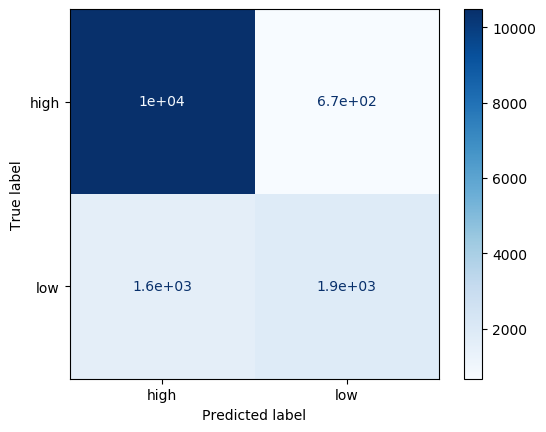

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명

p.plot(cmap = 'Blues')                                        # 컬러맵 적용해 출력

# 셀의 값이 클수록 진하게 표현

#### 성능 평가 지표 구하기
- 정답 여부(True/False): 모델의 예측값이 실제값과 일치하면 True, 아니면 False
- 예측 클래스(Positive/Negative): 타겟 변수의 클래스 중 모델이 예측하고자 하는 관심 클래스는 Positive, 모델의 목적이 고소득자를 찾아내는 것이면 income이 high이면 Positive, low이면 Negative

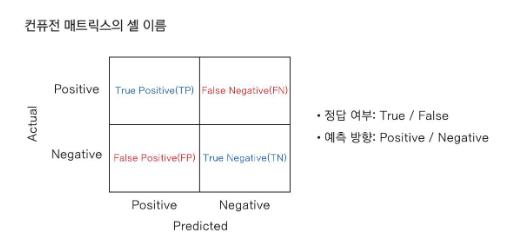

**accuracy**
- 정확도(accuracy): 모델이 예측해서 맞춘(True) 비율, 모델의 성능을 평가할 때 기본적으로 사용하는 평가 척도

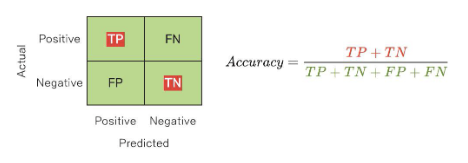

In [50]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'],  # 실제값
                       y_pred = df_test['pred'])    # 예측값

0.8439909916058145

**precision**
- 정밀도(precision): 모델이 관심 클래스를 예측해서 맞춘 비율
- 고소득자 예측 모델에서는 모델이 income을 high로 예측한 사람 중에서 실제로 high인 사람의 비율
- 모델 사용 목적이 관심 클래스를 정확하게 예측하는 것일 때 사용
    - 고소득자를 예측해 고가의 제품을 홍보한다면, 고소득자로 예측했을 때 얼마나 잘 맞는지 살펴봐야 함

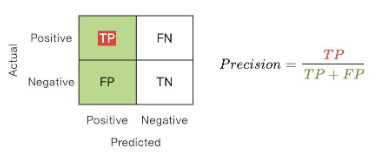

In [46]:
metrics.precision_score(y_true = df_test['income'],  # 실제값
                        y_pred = df_test['pred'],    # 예측값
                        pos_label = '1')          # 관심 클래스

0.7386541471048513

**recall**
- 재현율(recall): 모델이 실제 데이터에서 관심 클래스를 찾아낸 비율, 민감도(sensitivity)라고도 함
- 고소득자 예측 모델에서는 income이 실제로 high인 사람 중에서 모델이 high로 예측해서 찾아낸 사람의 비율
- 모델 사용 목적이 관심 클래스를 최대한 많이 찾아내는 것일 때 사용
    - 전염병에 감염된 사람을 최대한 많이 찾아내 격리해야 한다면, 실제로 전염병에 감염된 사람 중에서 몇 퍼센트를 감염된 것으로 예측하는지가 중요 

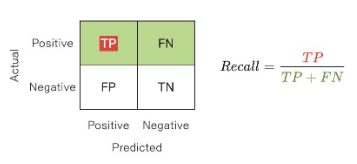

In [48]:
metrics.recall_score(y_true = df_test['income'],  # 실제값
                     y_pred = df_test['pred'],    # 예측값
                     pos_label = '1')          # 관심 클래스


0.5385054192812322

관심 클래스로 잘 못 예측할때(Type 1 error) 손실 VS 관심 클래스인데 놓칠 때(Type II error) 손실
- 관심 클래스로 예측했는데 틀릴 때 손실이 더 크면 precision 적용
    - 저소득자를 고소득자로 잘 못 예측했을 때의 손실: 값비싼 선물
    - 고소득자를 저소득자로 잘 못 예측했을 때의 손실: 고소득자에게 선물을 보내지 않음?
    
    
- 관심 클래스를 놓칠 때 손실이 더 크면 recall 적용
    - 정상인을 확진자로 잘 못 예측했을 때의 손실: 불필요하게 격리
    - 확진자를 정상인으로 잘 못 예측했을 때의 손실: 전염병 확산

**F1 score**
- recall과 precision이 모두 중요할 때 두 척도를 함께 반영한 척도
- recall과 precision의 조화평균, 0~1 사이의 값, 성능이 높을수록 1에 가까운 값
- 클래스가 불균형해도 모델의 성능을 잘 나타내므로 여러 모델의 성능을 한 가지 지표로 비교해야 할 때 특히 자주 사용됨

- accuracy와 달리, 타겟 변수의 클래스가 불균형해도 모델의 성능을 잘 표현
- Negative 클래스가 훨씬 많은 불균형 데이터를 예측할 때 대부분 Negative로 예측하면 Positive 클래스를 거의 맞추지 못해도 accuracy는 높게 나오지만, F1 score는 recall과 precision 중 하나라도 작으면 작은 값을 가지게 됨

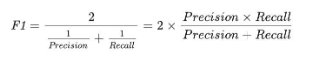

F1 score를 구할 때 산술평균이 아닌 조화평균을 이용하는 이유는 recall과 precision 중 하나라도 작으면 값을 크게 낮추기 위해서임  
ex) recall이 99%, precision이 1% 일 때 산술평균은 50%이지만 조화평균은 1.98% 
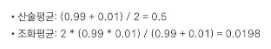

In [49]:
metrics.f1_score(y_true = df_test['income'],  # 실제값
                 y_pred = df_test['pred'],    # 예측값
                 pos_label = '1')          # 관심 클래스

0.6228967337512372

기존 방식 보다 모델을 사용할 때 성능 지표가 높다면, 예측에 소요되는 시간과 비용을 고려하여 모델 사용 결정

[참고: 오버 피팅]
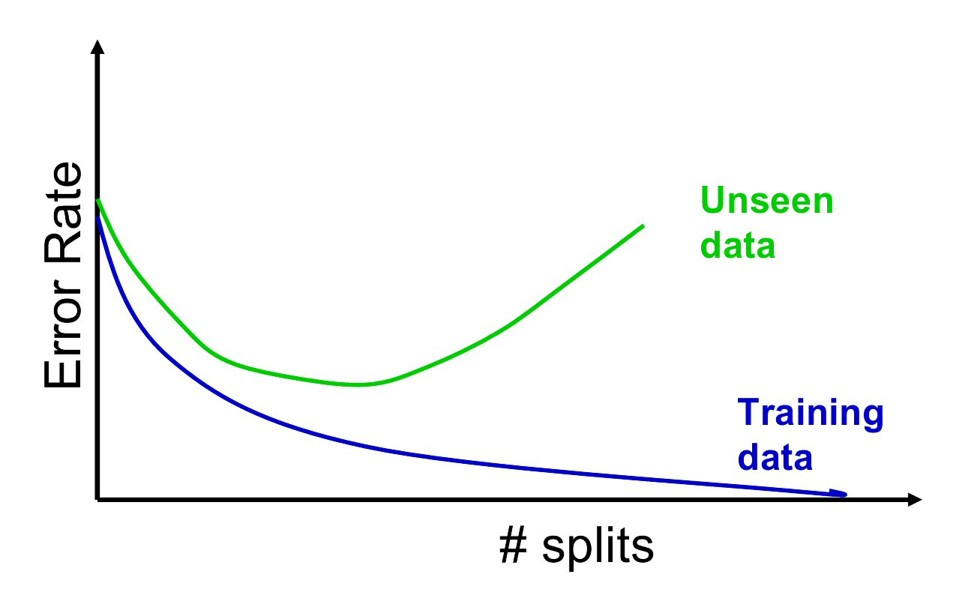

[참고: 지니 계수 불순도를 이용한 노드 분할 예시]
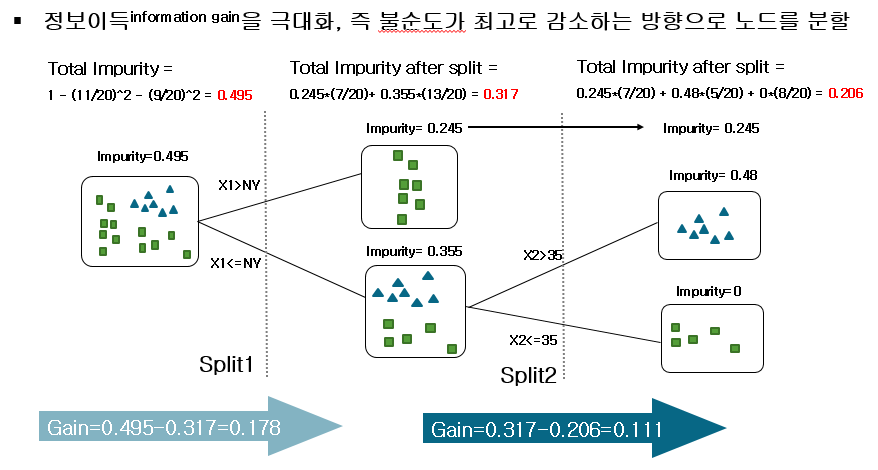

---

### 정리하기

In [ ]:
## 1. 전처리

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('adult.csv')

# 1. 타겟 변수 전처리
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')

# 2. 불필요한 변수 제거하기
df = df.drop(columns = 'fnlwgt')

# 3. 문자 타입 변수를 숫자 타입으로 바꾸기
target = df['income']             # income 추출
df = df.drop(columns = 'income')  # income 제거
df = pd.get_dummies(df)           # 원핫 인코딩으로 변환
df['income'] = target             # df에 target 삽입

# 4. 데이터 분할하기
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율
                                     stratify = df['income'],  # 타겟 변수 비율 유지
                                     random_state = 1234)      # 난수 고정


## 2. 의사결정나무 모델 만들기

# 모델 설정하기
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정
                                  max_depth = 3)        # 나무 깊이

# 모델 만들기
train_x = df_train.drop(columns = 'income')             # 예측 변수 추출
train_y = df_train['income']                            # 타겟 변수 추출
model = clf.fit(X = train_x, y = train_y)               # 모델 만들기

# 모델 구조 살펴보기
import matplotlib.pyplot as plt
tree.plot_tree(model,
               feature_names = train_x.columns,    # 예측 변수명
               class_names = ["high", "low"],      # 타겟 변수 클래스, 알파벳순, 모델이름.classes_
               proportion = True,                  # 비율 표기
               filled = True,                      # 색칠
               rounded = True,                     # 둥근 테두리
               impurity = False,                   # 불순도 표시
               fontsize = 12)                      # 글자 크기


## 3. 모델을 이용해 예측하기

# 예측하기
test_x = df_test.drop(columns = 'income')    # 예측 변수 추출
test_y = df_test['income']                   # 타겟 변수 추출
df_test['pred'] = model.predict(test_x)      # 예측값 구하기

## 4. 성능 평가하기

# confusion matrix 만들기
from sklearn import metrics
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서

# confusion matrix 시각화
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명
p.plot(cmap = 'Blues')                                        # 컬러맵 적용해 출력

# accuracy
metrics.accuracy_score(y_true = df_test['income'],   # 실제값
                       y_pred = df_test['pred'])     # 예측값

# precision
metrics.precision_score(y_true = df_test['income'],  # 실제값
                        y_pred = df_test['pred'],    # 예측값
                        pos_label = 'high')          # 관심 클래스

# recall
metrics.recall_score(y_true = df_test['income'],     # 실제값
                     y_pred = df_test['pred'],       # 예측값
                     pos_label = 'high')             # 관심 클래스

# F1 score
metrics.f1_score(y_true = df_test['income'],         # 실제값
                 y_pred = df_test['pred'],           # 예측값
                 pos_label = 'high')                 # 관심 클래스
